Font : Pyjamas Conference (dec 5-6 2021 by Harshdeep Singh, CCDS, IIT Kharagpur) https://www.youtube.com/watch?v=Z6GxV8UGuQU&list=PLiwrSoq9tHkGREiplS0cWA3Oa2V3leMB5&index=3
---
Requierements : qiskit, matplotlib, pylatexenc
---
Tutorial made with version 0.19.0 but youtube talk was with an earlier version

In [52]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

# Calling the qubits and classical registers

## Creating a single qubit (the number means how many qubits we create)

In [53]:
qubit = QuantumRegister(1)

## Creating a classical register: store the result of the  measurement

In [54]:
classical = ClassicalRegister(1)

# Making our first circuit

In [55]:
circuit = QuantumCircuit(qubit, classical)

## Displaying the circuit. The 0 means the 0st element of the qubit and classical registers

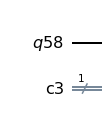

In [56]:
display(circuit.draw('mpl'))

## Adding the measurement. Measures the 0th qubit (left) and stores it in the 0th classical register (right)

In [57]:
circuit.measure(0, 0)

## Displaying the circuit. The black symbol means that we are doing a mesurement and the arrow means that we are storing the value in the 0th classical register

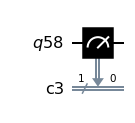

In [58]:
display(circuit.draw('mpl'))

# Performing a measurement

## Step-1 : Prepare a simulator (we are running it in a classical computer!)

In [59]:
simulator = Aer.get_backend('qasm_simulator')

## Step-2 : Execute the circuit

In [60]:
job = execute(circuit, simulator, shots=1000)

## Step-3 : Get the result

In [61]:
result = job.result()

## Get the counts (number of times we have either 0 or 1)

In [62]:
counts = result.get_counts()

## Display the results

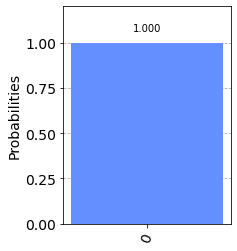

In [63]:
display(plot_histogram(counts, figsize=(3, 4)))

# Gates

## NOT gate

In [64]:
circuit.x(0) # We will measure the not of input 0

### Adding measurement and displaying circuit (the drawing tool is not refreshed, consider from the last X to the end )

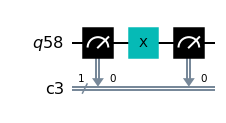

In [65]:
circuit.measure(0, 0)
display(circuit.draw('mpl'))

### Performing measurement 

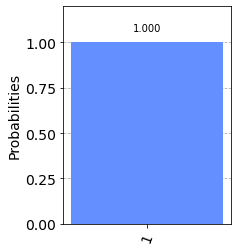

In [66]:
simulator_2 = Aer.get_backend('qasm_simulator')
job_2 = execute(circuit, simulator_2, shots=1000)
result_2 = job_2.result()
counts_2 = result_2.get_counts()
display(plot_histogram(counts_2, figsize=(3, 4)))

# Operators : one-qubit operators and multiple-qbut operators

## One-qubit operator
### The Hadamard Operator: take defined states and returns the superposition states

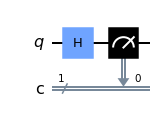

In [67]:
circuit2 = QuantumCircuit(1, 1) # Another way to create circuits (qubits, classical registry)
circuit2.h(0) # Adding the Hadamard gate at the 0th qubit
circuit2.measure(0, 0)
display(circuit2.draw('mpl'))

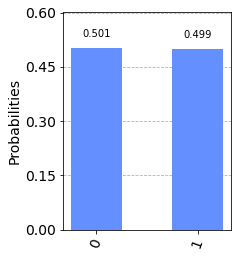

In [68]:
simulator2 = Aer.get_backend('qasm_simulator')
job2 = execute(circuit2, simulator2, shots=1000)
result2 = job2.result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, figsize=(3, 4)))

## Multiple-qubit Operator: 
One of they most important class of multiple-qubit operators are the controlled operators, where some qubits acts as the 'control qubit' to decide whether a particular operation will be carried out or not, adn the 'target qubit' on which the operation is being applied.

### Controlled-NOT (CNOT) operator: NOT gate will be applied on the target qubit if the control qubit is in state |1>

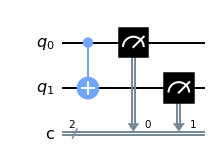

In [70]:
# First example: CNOT|00>
circuit3 = QuantumCircuit(2, 2) # 2 qubits, 2 classical registries
circuit3.cnot(0, 1) # circuit gate from qubit 0 to qubit one. 0 qubit is control and 1 is target.
circuit3.measure([0, 1], [0, 1]) # measurement of 0th qubit will be on the 0th classical registry and the same for the 1st.
display(circuit3.draw('mpl'))

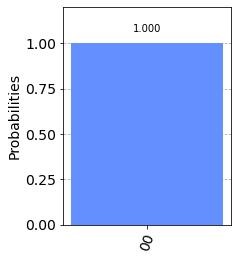

In [76]:
simulator = Aer.get_backend('qasm_simulator')
job3 = execute(circuit3, simulator, shots=1000)
result3 = job3.result()
count3 = result3.get_counts()
display(plot_histogram(count3, figsize=(3, 4)))

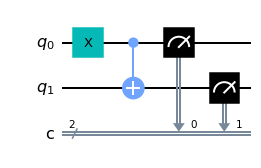

In [74]:
# Second example: CNOT|01>
circuit4 = QuantumCircuit(2, 2) # 2 qubits, 2 classical registries
circuit4.x(0) # Changes state of qubit on 0th position (control one)
circuit4.cnot(0, 1) # circuit gate from qubit 0 to qubit one. 0 qubit is control and 1 is target.
circuit4.measure([0, 1], [0, 1]) # measurement of 0th qubit will be on the 0th classical registry and the same for the 1st.
display(circuit4.draw('mpl'))

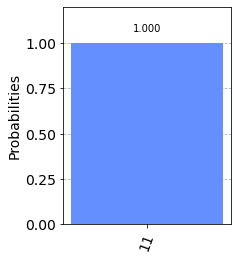

In [75]:
simulator = Aer.get_backend('qasm_simulator')
job4 = execute(circuit4, simulator, shots=1000)
result4 = job4.result()
count4 = result4.get_counts()
display(plot_histogram(count4, figsize=(3, 4)))